In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import shutil
import tempfile
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [ ]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#explore the training set
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

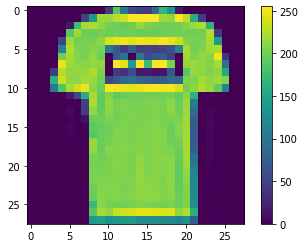

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# scale to range 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

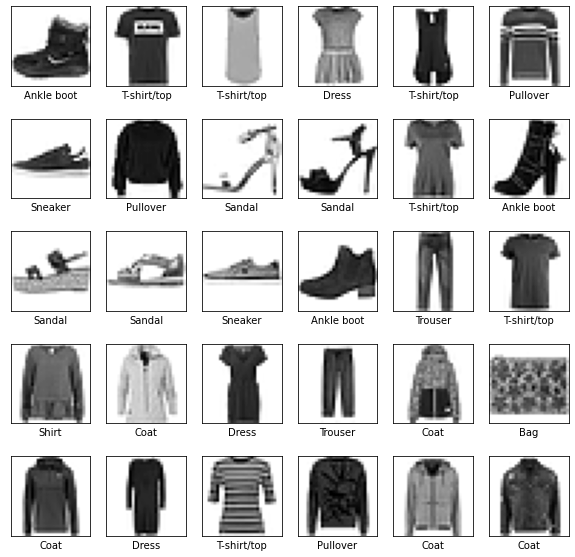

In [ ]:
# looks like no errors in labels
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 1. A small DNN model with 1 layer of 128 nuerons.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5163 - accuracy: 0.8211 - val_loss: 0.4244 - val_accuracy: 0.8518
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3872 - accuracy: 0.8616 - val_loss: 0.3892 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3483 - accuracy: 0.8733 - val_loss: 0.3705 - val_accuracy: 0.8682
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3221 - accuracy: 0.8829 - val_loss: 0.3455 - val_accuracy: 0.8747
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3020 - accuracy: 0.8893 - val_loss: 0.3275 - val_accuracy: 0.8839
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2876 - accuracy: 0.8944 - val_loss: 0.3467 - val_accuracy: 0.8777
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2769 - accuracy: 0.8988 - val_loss: 0.3262 - val_accuracy:

In [ ]:
sel_histories={}
sel_histories['tiny']=history
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.39221876859664917
Test accuracy: 0.8769999742507935


In [ ]:

# list all data in history
print(sel_histories['tiny'].history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


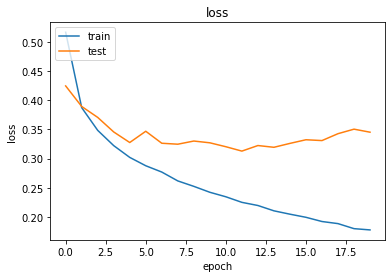

In [ ]:
plt.plot(sel_histories['tiny'].history['loss'])
plt.plot(sel_histories['tiny'].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can see we were able to see accuracy of 93% on training data, unfortunately model didn't generalize well on test data (overfitting) with accuracy of 88%. As the plot shows above losses go up on validation set, while losses on training set continue going down, this indicates overfitting.


Try a different model: The first layer and the second layer should have neuron sizes of 32 and 16, respectively. Train this model for 20 epochs.

## 2. A model with 2 layers of 32 and 16 neurons, 'relu' activation

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6007 - accuracy: 0.7909 - val_loss: 0.4556 - val_accuracy: 0.8396
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4338 - accuracy: 0.8463 - val_loss: 0.4322 - val_accuracy: 0.8478
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3936 - accuracy: 0.8601 - val_loss: 0.4362 - val_accuracy: 0.8428
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3687 - accuracy: 0.8678 - val_loss: 0.4140 - val_accuracy: 0.8566
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3464 - accuracy: 0.8758 - val_loss: 0.3697 - val_accuracy: 0.8676
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3323 - accuracy: 0.8792 - val_loss: 0.3741 - val_accuracy: 0.8654
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3209 - accuracy: 0.8827 - val_loss: 0.3613 - val_accuracy:

In [ ]:
sel_histories={}
sel_histories['tiny']=history
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3937540054321289
Test accuracy: 0.8672000169754028


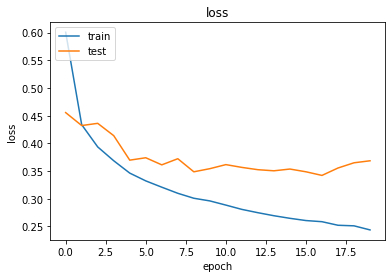

In [ ]:
plt.plot(sel_histories['tiny'].history['loss'])
plt.plot(sel_histories['tiny'].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The result of this model is slightly less accurate then the previous model

## The big model with 5 layers of 1024, 512, 256, 128,64 neurons, 'relu' activation

In [ ]:
model = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.5254 - accuracy: 0.8077 - val_loss: 0.4239 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3957 - accuracy: 0.8560 - val_loss: 0.3645 - val_accuracy: 0.8702
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3536 - accuracy: 0.8720 - val_loss: 0.3645 - val_accuracy: 0.8752
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3235 - accuracy: 0.8804 - val_loss: 0.3997 - val_accuracy: 0.8573
Epoch 5/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3018 - accuracy: 0.8882 - val_loss: 0.3539 - val_accuracy: 0.8767
Epoch 6/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2895 - accuracy: 0.8923 - val_loss: 0.3361 - val_accuracy: 0.8834
Epoch 7/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2770 - accuracy: 0.8994 - val_loss: 0.3471 -

In [ ]:
sel_histories['big']=history
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3877584934234619
Test accuracy: 0.8885999917984009


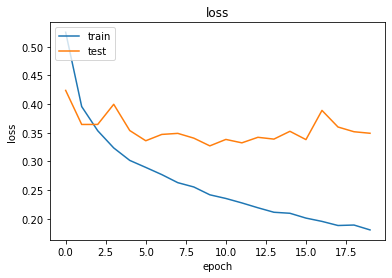

In [ ]:
plt.plot(sel_histories['big'].history['loss'])
plt.plot(sel_histories['big'].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### As we can see the model still overfits, the results are no much different

# Let's try different activation function

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5095 - accuracy: 0.8185 - val_loss: 0.4261 - val_accuracy: 0.8463
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3903 - accuracy: 0.8578 - val_loss: 0.3931 - val_accuracy: 0.8612
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3528 - accuracy: 0.8709 - val_loss: 0.3575 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3238 - accuracy: 0.8806 - val_loss: 0.3424 - val_accuracy: 0.8795
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.8880 - val_loss: 0.3292 - val_accuracy: 0.8803 - ETA: 0s - loss: 0.3046 - accuracy: 0.88
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2882 - accuracy: 0.8922 - val_loss: 0.3282 - val_accuracy: 0.8803
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2740 - accuracy:

Once again, the accuracy is about the same, the model overfitts on validation data.

# Let's try different batch size, number of epochs

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=20, batch_size=60, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 3s 4ms/step - loss: 0.5398 - accuracy: 0.8137 - val_loss: 0.4580 - val_accuracy: 0.8410
Epoch 2/20
800/800 [==============================] - 4s 5ms/step - loss: 0.4024 - accuracy: 0.8576 - val_loss: 0.3929 - val_accuracy: 0.8616
Epoch 3/20
800/800 [==============================] - 4s 5ms/step - loss: 0.3609 - accuracy: 0.8692 - val_loss: 0.3866 - val_accuracy: 0.8637
Epoch 4/20
800/800 [==============================] - 4s 5ms/step - loss: 0.3310 - accuracy: 0.8804 - val_loss: 0.3510 - val_accuracy: 0.8742
Epoch 5/20
800/800 [==============================] - 3s 4ms/step - loss: 0.3132 - accuracy: 0.8857 - val_loss: 0.3882 - val_accuracy: 0.8530
Epoch 6/20
800/800 [==============================] - 3s 4ms/step - loss: 0.2946 - accuracy: 0.8928 - val_loss: 0.3349 - val_accuracy: 0.8818
Epoch 7/20
800/800 [==============================] - 2s 3ms/step - loss: 0.2805 - accuracy: 0.8969 - val_loss: 0.3268 - val_accuracy: 0.8848
Epoch 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=90, batch_size=10, validation_split=0.2)

Epoch 1/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4975 - accuracy: 0.8236 - val_loss: 0.3914 - val_accuracy: 0.8573
Epoch 2/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3745 - accuracy: 0.8644 - val_loss: 0.3976 - val_accuracy: 0.8539
Epoch 3/90
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3378 - accuracy: 0.8749 - val_loss: 0.3423 - val_accuracy: 0.8801
Epoch 4/90
4800/4800 [==============================] - 23s 5ms/step - loss: 0.3151 - accuracy: 0.8837 - val_loss: 0.3622 - val_accuracy: 0.8680
Epoch 5/90
4800/4800 [==============================] - 22s 5ms/step - loss: 0.2957 - accuracy: 0.8899 - val_loss: 0.3346 - val_accuracy: 0.8796
Epoch 6/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.2809 - accuracy: 0.8963 - val_loss: 0.3349 - val_accuracy: 0.8860
Epoch 7/90
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2691 - accuracy: 0.8982 - val_loss: 0.3412 - val_ac

4800/4800 [==============================] - 20s 4ms/step - loss: 0.1006 - accuracy: 0.9627 - val_loss: 0.6025 - val_accuracy: 0.8868
Epoch 58/90
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0990 - accuracy: 0.9632 - val_loss: 0.6493 - val_accuracy: 0.8857
Epoch 59/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0984 - accuracy: 0.9633 - val_loss: 0.6165 - val_accuracy: 0.8832
Epoch 60/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0986 - accuracy: 0.9637 - val_loss: 0.6268 - val_accuracy: 0.8867
Epoch 61/90
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0948 - accuracy: 0.9648 - val_loss: 0.6251 - val_accuracy: 0.8867
Epoch 62/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.0953 - accuracy: 0.9642 - val_loss: 0.6453 - val_accuracy: 0.8894
Epoch 63/90
4800/4800 [==============================] - 21s 4ms/step - loss: 0.0936 - accuracy: 0.9642 - val_loss: 0.6301 - val_accurac

As we can see accuracy on training test reached 97%, but on validation set it's still 88%, making batch size smaller and bigger number of epochs increased accuracy on the training data, but we have to deal with overfitting

We are going to implement DROPOUT technic. It is one of the most popular regularization technic to reduce overfitting. At every layer, excluding the first input layer, every neuron will have probability of p being temporarily terminated. Neorons with dropout method cannont coadapt with their neighbors, they have to rely on their own. They are becoming les sensitive of the incoming input and the model will generalize better.

## DROPUT method

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='elu'),
   
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=90, batch_size=10, validation_split=0.2)

Epoch 1/90
4800/4800 [==============================] - 9s 2ms/step - loss: 0.5991 - accuracy: 0.7800 - val_loss: 0.4439 - val_accuracy: 0.8371: 4s - loss: 0.8388 - accuracy - ETA: 4s - loss: 0.7979 - accuracy:  - ETA: 4s - loss: 0.7717 -  - ETA: 4s - loss: 0.7310 - accuracy:  - ETA: 3s - loss: 0.7205 - accuracy: 0. - ETA: 3s - loss: 0.7147 - accuracy: 0. - ETA: 3s - loss: 0.7063 - ac - ETA: 3s - loss: 0.6884 - accuracy - ETA: 3s - loss: 0.6 - ETA: 2s - loss: 0.6573 -  - ETA: 2s - loss: 0.6466 - accuracy:  - ETA: 2s - loss: 0.6438 - accuracy: 0. - ETA: 2s - loss: 0.6425 - accuracy: 0.76 - ETA: 1s - ETA: 1s - loss: 0.6194 -  - ETA: 0s - loss: 0.612 - ETA: 0s - loss: 0.6020 - accuracy
Epoch 2/90
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4850 - accuracy: 0.8176 - val_loss: 0.3990 - val_accuracy: 0.85374s - loss: 0.4940 - accura - ETA: 4s - loss: 0.5016 - accuracy - ETA: 4s - loss: 0.4982 - accu - E - ETA: 2s - loss: 0.4864 - accuracy:  - ETA: 1s - ETA: 0s - loss: 

4800/4800 [==============================] - 13s 3ms/step - loss: 0.3304 - accuracy: 0.8763 - val_loss: 0.3315 - val_accuracy: 0.8822
Epoch 51/90
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3295 - accuracy: 0.8776 - val_loss: 0.3265 - val_accuracy: 0.8832.3293 - accuracy:  - ETA: 1s - loss: 0.3306 - accuracy: 0.87 - ETA
Epoch 52/90
4800/4800 [==============================] - 13s 3ms/step - loss: 0.3306 - accuracy: 0.8754 - val_loss: 0.3263 - val_accuracy: 0.8847
Epoch 53/90
4800/4800 [==============================] - 14s 3ms/step - loss: 0.3309 - accuracy: 0.8764 - val_loss: 0.3346 - val_accuracy: 0.8792
Epoch 54/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3311 - accuracy: 0.8769 - val_loss: 0.3238 - val_accuracy: 0.8833
Epoch 55/90
4800/4800 [==============================] - 20s 4ms/step - loss: 0.3324 - accuracy: 0.8765 - val_loss: 0.3317 - val_accuracy: 0.8773
Epoch 56/90
4800/4800 [==============================] - 18s 4ms/step -

Dropout method fixed overfitting

In [ ]:
sel_histories['dropout']=history
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.36711612343788147
Test accuracy: 0.8736000061035156


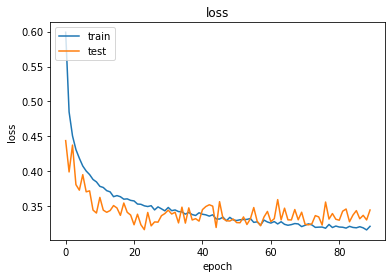

In [ ]:
plt.plot(sel_histories['dropout'].history['loss'])
plt.plot(sel_histories['dropout'].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential([
   
    tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=90, batch_size=10, validation_split=0.2)

Epoch 1/90
4800/4800 [==============================] - 52s 11ms/step - loss: 0.6820 - accuracy: 0.7516 - val_loss: 0.4743 - val_accuracy: 0.8278
Epoch 2/90
4800/4800 [==============================] - 49s 10ms/step - loss: 0.5544 - accuracy: 0.7959 - val_loss: 0.4809 - val_accuracy: 0.8177
Epoch 3/90
4800/4800 [==============================] - 47s 10ms/step - loss: 0.5229 - accuracy: 0.8124 - val_loss: 0.4573 - val_accuracy: 0.8270
Epoch 4/90
4800/4800 [==============================] - 57s 12ms/step - loss: 0.4839 - accuracy: 0.8259 - val_loss: 0.3980 - val_accuracy: 0.8513
Epoch 5/90
4800/4800 [==============================] - 55s 11ms/step - loss: 0.4591 - accuracy: 0.8312 - val_loss: 0.5315 - val_accuracy: 0.8242
Epoch 6/90
4800/4800 [==============================] - 59s 12ms/step - loss: 0.6149 - accuracy: 0.8384 - val_loss: 0.3936 - val_accuracy: 0.8601
Epoch 7/90
4800/4800 [==============================] - 58s 12ms/step - loss: 0.4366 - accuracy: 0.8418 - val_loss: 0.3923 -

Epoch 57/90
4800/4800 [==============================] - 44s 9ms/step - loss: 0.3067 - accuracy: 0.8899 - val_loss: 0.3196 - val_accuracy: 0.8838
Epoch 58/90
4800/4800 [==============================] - 46s 10ms/step - loss: 0.3100 - accuracy: 0.8879 - val_loss: 0.3134 - val_accuracy: 0.8869
Epoch 59/90
4800/4800 [==============================] - 47s 10ms/step - loss: 0.3445 - accuracy: 0.8867 - val_loss: 0.3348 - val_accuracy: 0.8804
Epoch 60/90
4800/4800 [==============================] - 45s 9ms/step - loss: 0.3164 - accuracy: 0.8892 - val_loss: 0.3220 - val_accuracy: 0.8847
Epoch 61/90
4800/4800 [==============================] - 45s 9ms/step - loss: 0.3060 - accuracy: 0.8879 - val_loss: 0.3448 - val_accuracy: 0.8836
Epoch 62/90
4800/4800 [==============================] - 37s 8ms/step - loss: 0.3445 - accuracy: 0.8892 - val_loss: 0.3052 - val_accuracy: 0.8912
Epoch 63/90
4800/4800 [==============================] - 37s 8ms/step - loss: 0.9005 - accuracy: 0.8883 - val_loss: 0.3238

In [ ]:
sel_histories['dropout_big']=history
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3484502136707306
Test accuracy: 0.8831999897956848


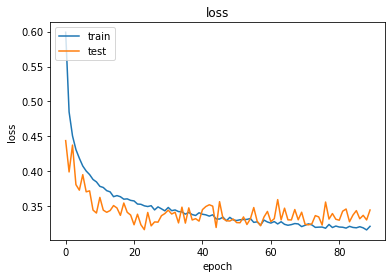

In [ ]:
plt.plot(sel_histories['dropout'].history['loss'])
plt.plot(sel_histories['dropout'].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The dropout method imroved the model by reducing overfitting, the bigger model with more layers gave similar results compared to a smaller model with the same dropout parameter.

# CNN model

In [ ]:
train_images=train_images.reshape((train_images.shape[0], 28, 28, 1))
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='valid', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=()),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
	tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.4075 - accuracy: 0.8554 - val_loss: 0.3020 - val_accuracy: 0.8899
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2685 - accuracy: 0.9016 - val_loss: 0.2714 - val_accuracy: 0.9018
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2218 - accuracy: 0.9194 - val_loss: 0.2561 - val_accuracy: 0.9093
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1910 - accuracy: 0.9289 - val_loss: 0.2501 - val_accuracy: 0.9112
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1644 - accuracy: 0.9394 - val_loss: 0.2496 - val_accuracy: 0.9148
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1419 - accuracy: 0.9485 - val_loss: 0.2573 - val_accuracy: 0.9147
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1261 - accuracy: 0.9535 - val_loss: 0.2621 -

In [ ]:
test_images=test_images.reshape((test_images.shape[0], 28, 28, 1))
sel_histories['conv']=history
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.34093281626701355
Test accuracy: 0.9067999720573425


In [ ]:
test_images.shape

(10000, 28, 28)

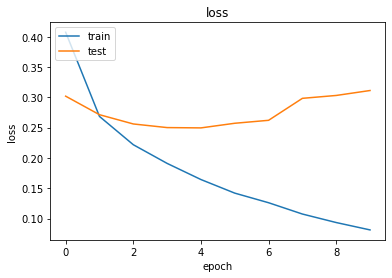

In [ ]:
plt.plot(sel_histories['conv'].history['loss'])
plt.plot(sel_histories['conv'].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

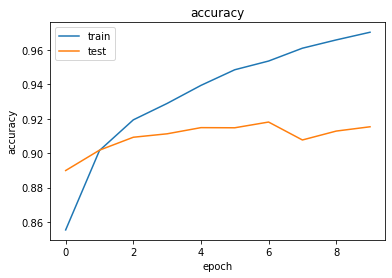

In [ ]:
plt.plot(sel_histories['conv'].history['accuracy'])
plt.plot(sel_histories['conv'].history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion

I've tried different models with different parameters on MNIST clothing dataset. The small DNN model achived accuracy of 87% on test dataset with overfitting. The bigger models increased train accuracy at the cost of computation time, but the model still didn't generalize well. I've tried DROPOUT method to counteract overfitting. It made sense on a small dataset. This improved overfitting greatly. To improve accuracy scores I've tried implementing CNN - and indeed, I was able to reach scores of 97% accuracy on training set and over 90% on test data. What else could be done? I could try DROPOUT with CNN, other regularization methods, like batch normalization, l1, l2 regularization to keep constrains on weight values